Importing necessary dataset

In [14]:
import pandas as pd

pricing_data = pd.read_csv("Competition_Data.csv")

In [15]:
print(pricing_data.head())

   Index Fiscal_Week_ID   Store_ID   Item_ID   Price  Item_Quantity  \
0      0        2019-11  store_459  item_526  134.49            435   
1      1        2019-11  store_459  item_526  134.49            435   
2      2        2019-11  store_459  item_526  134.49            435   
3      3        2019-11  store_459  item_526  134.49            435   
4      4        2019-11  store_459  item_526  134.49            435   

   Sales_Amount_No_Discount  Sales_Amount  Competition_Price  
0                   4716.74      11272.59             206.44  
1                   4716.74      11272.59             158.01  
2                   4716.74      11272.59             278.03  
3                   4716.74      11272.59             222.66  
4                   4716.74      11272.59             195.32  


In [16]:
print(pricing_data.tail())

       Index Fiscal_Week_ID   Store_ID   Item_ID  Price  Item_Quantity  \
99995  99995        2019-15  store_197  item_743   94.1            351   
99996  99996        2019-15  store_197  item_743   94.1            351   
99997  99997        2019-15  store_197  item_743   94.1            351   
99998  99998        2019-15  store_197  item_743   94.1            351   
99999  99999        2019-15  store_197  item_743   94.1            351   

       Sales_Amount_No_Discount  Sales_Amount  Competition_Price  
99995                   2629.98      10675.67              52.93  
99996                   2629.98      10675.67             171.17  
99997                   2629.98      10675.67             288.83  
99998                   2629.98      10675.67             133.77  
99999                   2629.98      10675.67             206.00  


Let’s have a look at the column info before moving forward:

In [17]:
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 5.7+ MB


Now, let’s start by comparing the price distribution with the competition:

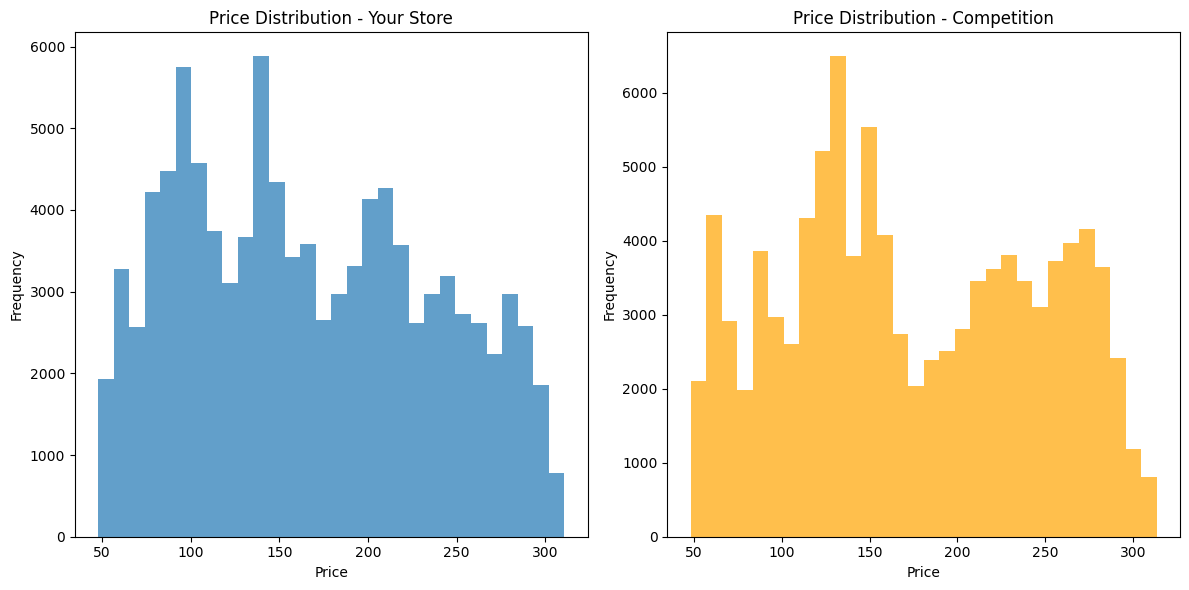

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(pricing_data['Price'], bins = 30, alpha = 0.7, label = 'Your Store')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Your Store')

plt.subplot(1, 2, 2)
plt.hist(pricing_data['Competition_Price'], bins = 30, alpha = 0.7, color = 'orange',  label = 'Competition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Competition')

plt.tight_layout()
plt.show()

It shows that the competition’s prices are generally higher, with peaks around the 100-150 and 200-250 price ranges, which indicate a concentration of higher-priced items. In contrast, our store’s prices are more evenly distributed across the 50-300 range, with notable peaks around 100-150.

Now, let’s compare the relationship between price and sales:

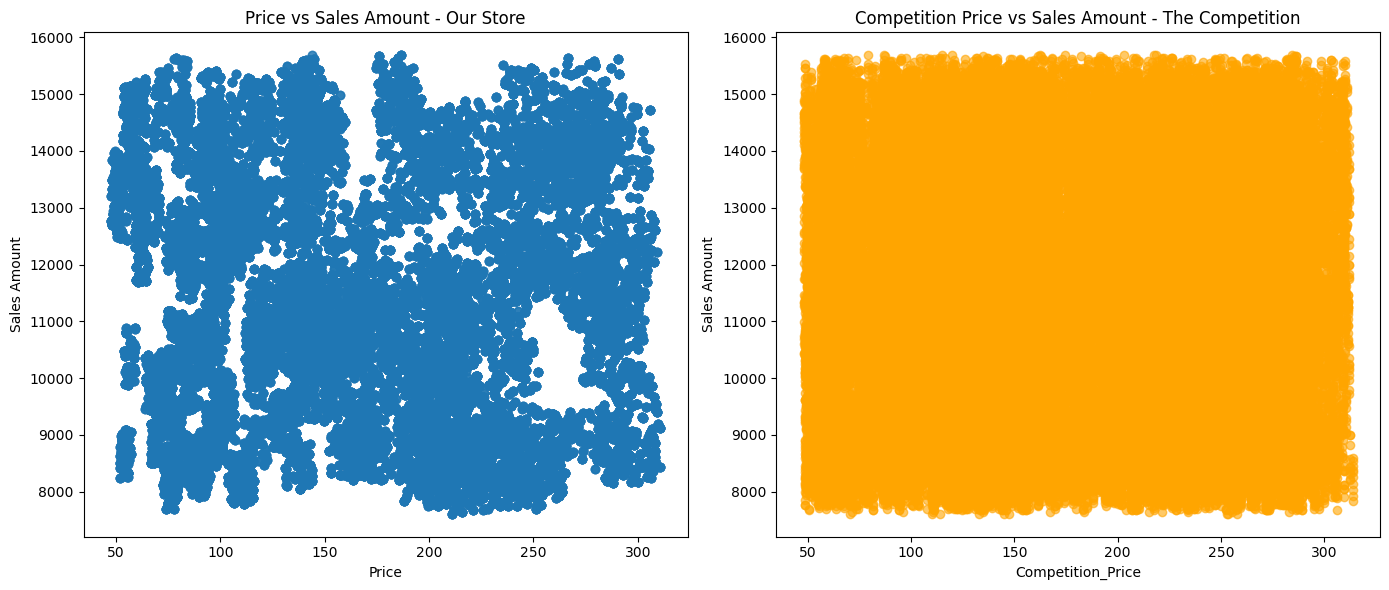

In [19]:
plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
plt.scatter(pricing_data['Price'], pricing_data['Sales_Amount'], alpha = 0.6, label = 'Our Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.title('Price vs Sales Amount - Our Store')

plt.subplot(1,2,2)
plt.scatter(pricing_data['Competition_Price'], pricing_data['Sales_Amount'], alpha = 0.6, color = 'orange', label = 'The Competition')
plt.xlabel('Competition_Price')
plt.ylabel('Sales Amount')
plt.title('Competition Price vs Sales Amount - The Competition')

plt.tight_layout()
plt.show()

The scatter plot compares our store's price vs sales amount with the competition price vs sales amount.
It is seen that our store has less dense clusters, indicating the store's variable sales at different price points.
In constrast, the competition has a more uniform sales, and consistent performance in all the available price points.
This suggests the competition might have a more effective pricing strategy, which maintains higher sales amount, more uniformly across different price points.

Time to compare price changes over time:

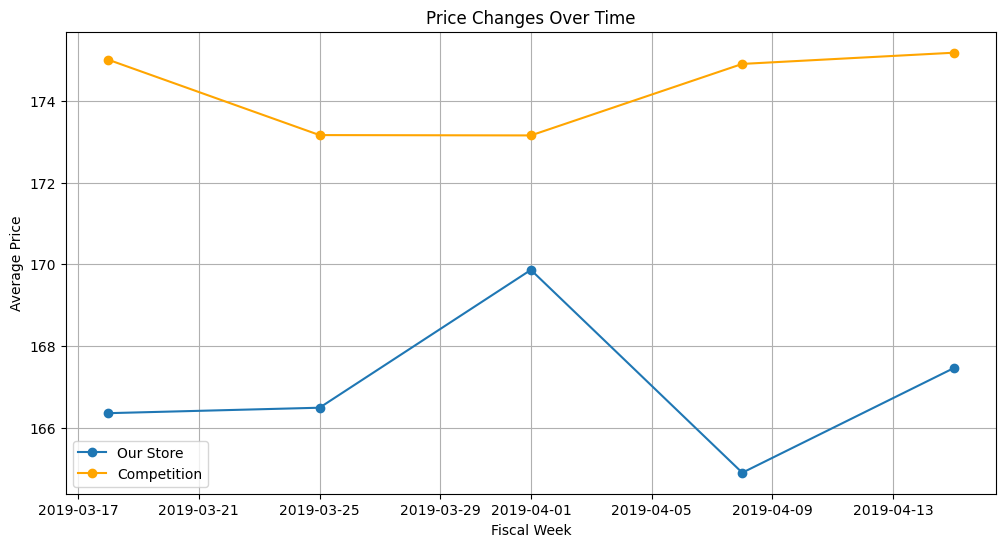

In [20]:
pricing_data['Fiscal_Week_ID'] = pd.to_datetime(pricing_data['Fiscal_Week_ID'] + '-1', format = '%Y-%U-%w')

weekly_prices = pricing_data.groupby('Fiscal_Week_ID').agg({
    'Price' : 'mean',
    'Competition_Price': 'mean'
}).reset_index()

plt.figure(figsize = (12,6))

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label = 'Our Store', marker = 'o')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label = 'Competition', marker = 'o', color = 'Orange')
plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title('Price Changes Over Time')

plt.legend()
plt.grid(True)
plt.show()

Here, we see the competition maintains higher average price over 172, with minor upward trend over the observed weeks.
On the other hand, we see our store's price start at a lower range, around 166, and seen to raise and dip sharply at times, in an upward trend as the competition over the past weeks.
The stability in the competition's pricing might be the contributing factor towards comparitive higher sales performance.

Now, let's analyze how prices changes affect the changes in quantity demanded.
For this, we need to calculate the Price Elasticity, which is given by:

Ed = % change in Quantity demanded / % change in price

To calculate and visualize Price Elasticity

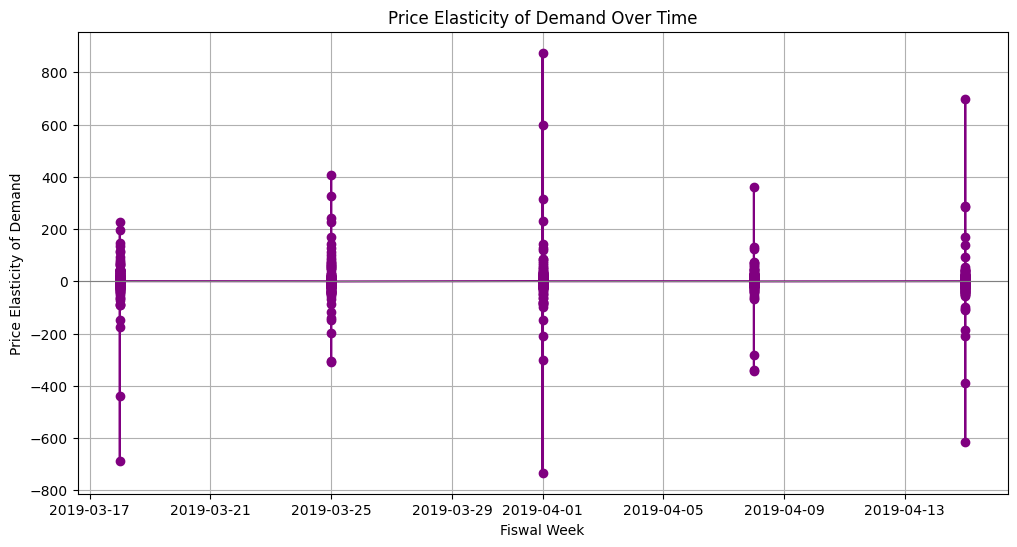

In [21]:
pricing_data['price_change'] = pricing_data['Price'].pct_change()
pricing_data['quantity_change'] = pricing_data['Item_Quantity'].pct_change()

pricing_data['Elasticity'] = pricing_data['quantity_change'] / pricing_data['price_change']

pricing_data.replace([float('inf'), -float('inf')], float('nan'), inplace = True)
pricing_data.dropna(subset = ['Elasticity'], inplace = True)

plt.figure(figsize = (12,6))
plt.plot(pricing_data['Fiscal_Week_ID'], pricing_data['Elasticity'], marker = 'o', linestyle = '-', color = 'purple')
plt.axhline(0, color = 'grey', linewidth = 0.8)
plt.xlabel('Fiswal Week')
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)
plt.show()

The graph shows price elasticity of demand over time. It indicates how price changes are affecting the consumer demands.
It indicates that the sensitivity of quantity demanded to price changes fluctuates considerably.
The graph shows variability of price elasticity over the weeks, with values ranging from highly positive to highly negative.
Highly positive values indicate, demand increase as price increased and highly negative indicate, sharp drop in demands as price increased.
The broad spread of elasticity indicates inconsistent response to price changes, which suggests, other factors such as promotions, seasonality, or market conditions, might be influencing consumer demands.

Now, let's compare the total sales amount of our store and the competition.

In [22]:
total_sales_our_store = pricing_data['Sales_Amount'].sum()
total_sales_competition = (pricing_data['Competition_Price']*pricing_data['Item_Quantity']).sum()

#pd.options.display.float_format = '{:.0f}'.format

total_qty_sold_our_store = pricing_data['Item_Quantity'].sum()
total_qty_sold_competition = pricing_data['Item_Quantity'].sum()

summary = pd.DataFrame({
    'Metric' : ['Total Sales Amount', 'Total Quantity Sold'],
    'Our Store': [total_sales_our_store, total_qty_sold_our_store],
    'Competition': [total_sales_competition, total_qty_sold_competition]
})

summary

,Metric,Our Store,Competition
0,Total Sales Amount,1.141005e+08,6.962097e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


The total sales amount of our store is 114,100,467.29, while the competition has significantly higher sales amount total of 696,209,705.06 (assumming the quantity of item sold are same).
This indicates the competition's pricing strategy is more effective in generating higher revenue.

Now, let's analyze if sales amount vary according to price brackets, this will indicate in which specific price ranges the competition outperforms the store.

In [23]:
# define price ranges
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# create price brackets for our store and competition
pricing_data['price_bracket'] = pd.cut(pricing_data['Price'], bins = bins, labels = labels, right = False)
pricing_data['competition_bracket'] = pd.cut(pricing_data['Competition_Price'], bins=bins, labels=labels, right = False)

# Calculate total sales amount for our store in the price brackets
sales_by_bracket_our_store = pricing_data.groupby('price_bracket', observed=False)['Sales_Amount'].sum().reset_index()
sales_by_bracket_our_store.columns = ['Price Bracket', 'Our Store']

# Calculate total sales amount for the competition in the price brackets
pricing_data['competition_sales_amount'] = pricing_data['Competition_Price']*pricing_data['Item_Quantity']
sales_by_bracket_competition = pricing_data.groupby('competition_bracket', observed = False)['competition_sales_amount'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition']

# Merge the two columns into a table
sales_by_bracket = pd.merge(sales_by_bracket_our_store, sales_by_bracket_competition, on = 'Price Bracket')
sales_by_bracket

,Price Bracket,Our Store,Competition
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


The table shows the total sales amount for our store and the competition across different price brackets.
Here are a few key observations:
<ul>
     <li> <b>0-50 Bracket:</b> The competition has significantly higher sales in this bracket. </li>
     <li> <b>51-100 Bracket:</b> The competition outperforms our store by a wide margin.</li>
     <li> <b>101-150 Bracket:</b> The competition's sales are nearly double those of our store.</li>
     <li> <b>151-200 Bracket:</b> The competition again has significantly higher sales.</li>
     <li> <b>201-250 Bracket:</b> The competition's sales are much higher than our store's sales.</li>
     <li> <b>251-300 Bracket:</b> The competition's sales again show to outperform that of our store's.</li>
     <li> <b>301-350 Bracket:</b> The competition sales are still higher though, the overall sales amount in this price bracket is lower than others.</li>
         
</ul>


### <B> Price Optimization with Dynamic Pricing

Now, let’s start by defining a dynamic pricing model and simulating its performance. Here are the steps we will use:

   1. We will enhance our dataset to include segments and calculate price elasticity for each segment.
   2. We’ll create segments based on purchasing behaviour and calculate price elasticity for each segment.
   3. We’ll define dynamic pricing rules based on competitor pricing, demand, and elasticity.
   4. We’ll simulate the dynamic pricing model and compare it with the existing pricing strategy.



Now, let’s start with segmenting the data and calculating the price elasticity for each segment:

In [24]:
# segmenting customers based on purchasing behavior

# calculate the average price and total quantity sold for each item
item_summary = pricing_data.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# merge item_summary with the main dataset
pricing_data = pd.merge(pricing_data, item_summary, on = 'Item_ID', suffixes=('','_avg'))

# create segments based on the average price
pricing_data['segment'] = pd.cut(pricing_data['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

# Calculate price elasticity for each segment
segments = pricing_data['segment'].unique()
elasticity_data = []

for segment in segments:
    segment_data = pricing_data[pricing_data['segment'] == segment]
    segment_data['Price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change']/segment_data['Price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment':segment, 'avg_elasticity':avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

<ipython-input-24-441ef774bbed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['Price_change'] = segment_data['Price'].pct_change()
<ipython-input-24-441ef774bbed>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
<ipython-input-24-441ef774bbed>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,segment,avg_elasticity
0,Medium,0.154444
1,High,0.148043


In the above code, we were able to analyze the average price and the total quantity sold for each item. This item summary was added back to the main dataset. With this, we were able to create different price segments depending on the average price on each item sold. We also, named the different segments as Low, Medium, and High, by allocating bins and differentiating them with respective bin sizes. We went ahead, to calculate the price elasticity for each segment, thereby to find how demand is affected, as price of an item in a segment is changed. This was done, by measuring both the percentage change in item quantity by percentage change in price.
Finally, we calculated the average elasticity, which gives insights on how sensitive a price segment is to price changes.
This would gives us more information, on how to optimize pricing, by understanding which segment is more sensitive/responsive to price changes.

Above, we see the "High" segment has elasticity value of 0.1480, lesser when compared to the "Medium" segment, this indicates demand is less sensitive to price changes in this segment. The consumers in the "Medium" segment, with elasticity value of 0.1544, higher than that of the "High" segment. Indicates they are more responsive to price changes.

Based on the elasticity, we can define the following dynamic pricing rules:
<ol>
<B>Medium Segment(Inelastic demand):</b> Demand is more sensitive to price changes than other segments.
We should optimize our pricing strategy to find a sweet spot to maximize revenue and prevent loss of sales volume.


<b>High Segment(Elastic demand(comparitively)):</B> The consumers are less sensitive/responsive to price changes.
This segment can explore viable pricing options, without causing major unwanted consequences to the sales.
</ol>

Now, let's implement a dynamic pricing model by adjusting prices based on elasticity and simulating the impact on sales and revenue:

In [ ]:
# create a copy of the dataset for simulation
dynamic_pricing_data = pricing_data.copy()

# apply dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment']=='Medium', 'dynamic_price']=dynamic_pricing_data['Price']*0.9
dynamic_pricing_data.loc[dynamic_pricing_data['segment']=='High', 'dynamic_price']=dynamic_pricing_data['Price']*1.05

# calculate total sales amount based on dynamic pricing
dynamic_pricing_data['dynamic_sales_amt']=dynamic_pricing_data['dynamic_price']*dynamic_pricing_data['Item_Quantity']

# calculate total sales amount between existing and dynamic pricing
total_sales_dynamic_pricing = dynamic_pricing_data['dynamic_sales_amt'].sum()
ttl_sales_exstng = pricing_data['Sales_Amount'].sum()

# calculate total itm qnty btw dynm prcg and exstg
ttl_qnty = pricing_data['Item_Quantity'].sum()
ttl_qnty_dyn = dynamic_pricing_data['Item_Quantity'].sum() # assuming the quantity remains same

# compare both the data

comparison_summary = pd.DataFrame({
    'Metrics': ['Total Sales Amount','Total Item Quantity'],
    'Existing Pricing': [ttl_sales_exstng, ttl_qnty],
    'Dynamic Pricing': [total_sales_dynamic_pricing, ttl_qnty_dyn]
})

comparison_summary

In the above code, we are trying to extrapolate on dynamically pricing on segments, which are least likely to be affected by price changes.

We start by a copy of the original dataset, and create dynamic prices by decreasing the Medium price segment by 10%, and increasing the High price segment by 5%. After which we create a series of sales amount for the newly changed prices. Assuming the item quantity remains same, we calculate the total sales amount for both exisitng pricing and the dynamically changed prices.
Finally we compare both the pricing, where the final result shows how the changes on both the segments would result in a increase in total sales for the store.

The dynamic pricing strategy results in a significantly higher total sales amount compared to the existing pricing strategy. This indicates that the dynamic pricing approach is more effective in maximizing revenue. Now, let’s finish this task by adding the dynamic prices in the dataset:


In [27]:
pricing_data['dynamic_price']=dynamic_pricing_data['dynamic_price']

### <b>Summary

We saw above, an minor example of how to use price optimization techniques, to primarily find demand elasticity, and how to dynamically price different price segments.
The findings from these tests will have to implemented in reality, by considering the other factors and parameters that can influence the results in this test. This test can however, be further enhanced by gathering more information, on item quantity before and after price changes, competition data, market trends and related data from reliable sources, which at the end of the day, will enable businesses to take better informed decisions.